## Computer Meal Source Functions

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns;
%matplotlib inline

In [3]:
import sys

sys.path.insert(0, "/home/mehrdad/Dropbox/utils/Ackerman/")

import PersonalizeParams as pp

## Load AVG 50 OGTT data and model

max glucose 3.666666666666666


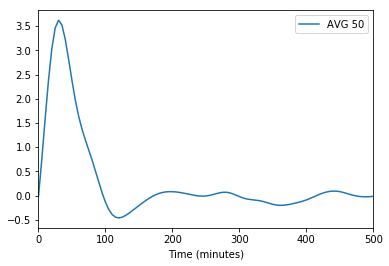

In [4]:
avg_50 = pp.avg_source_function("/home/mehrdad/Dropbox/work/gi-sensitivity-analysis/data/response-curve-data/cleaned/glucose-50g.csv")

time_samples = np.arange(0,2000,5)

plt.plot(time_samples, avg_50.signal(time_samples), label = "AVG 50")
plt.xlim([0,500])
plt.xlabel("Time (minutes)")
plt.legend();

## Load subject meals data

In [13]:
df_meals = pd.read_csv("/data/glucolytes/S6_Data.tsv", sep = "\t")

df_meals.time = pd.to_datetime(df_meals.time)
df_meals.GlucoseValue = pd.to_numeric(df_meals.GlucoseValue, errors="coerce")

baselined_glucose = df_meals.groupby([df_meals.Meal, df_meals.userID]).transform(lambda x: (x - x.iloc[0]))
baselined_glucose.columns = ["baseline_time", "baseline_glucose"]


baselined_glucose.baseline_time = pd.to_timedelta(baselined_glucose.baseline_time)
baselined_glucose["baseline_minutes"] = baselined_glucose.baseline_time.apply(lambda x: x.total_seconds()/60)

print("meals shape", df_meals.shape)
print("baselined meals shape", baselined_glucose.shape)
df_meals = pd.concat([df_meals, baselined_glucose], axis = 1)
print("meals shape after merge", df_meals.shape)

meals shape (6152, 4)
baselined meals shape (6152, 3)
meals shape after merge (6152, 7)


In [14]:
df_meal = df_meals[(df_meals.Meal == "Bar 1") | (df_meals.Meal == "Bar 2")]

pd.unique(df_meal.Meal)

array(['Bar 1', 'Bar 2'], dtype=object)

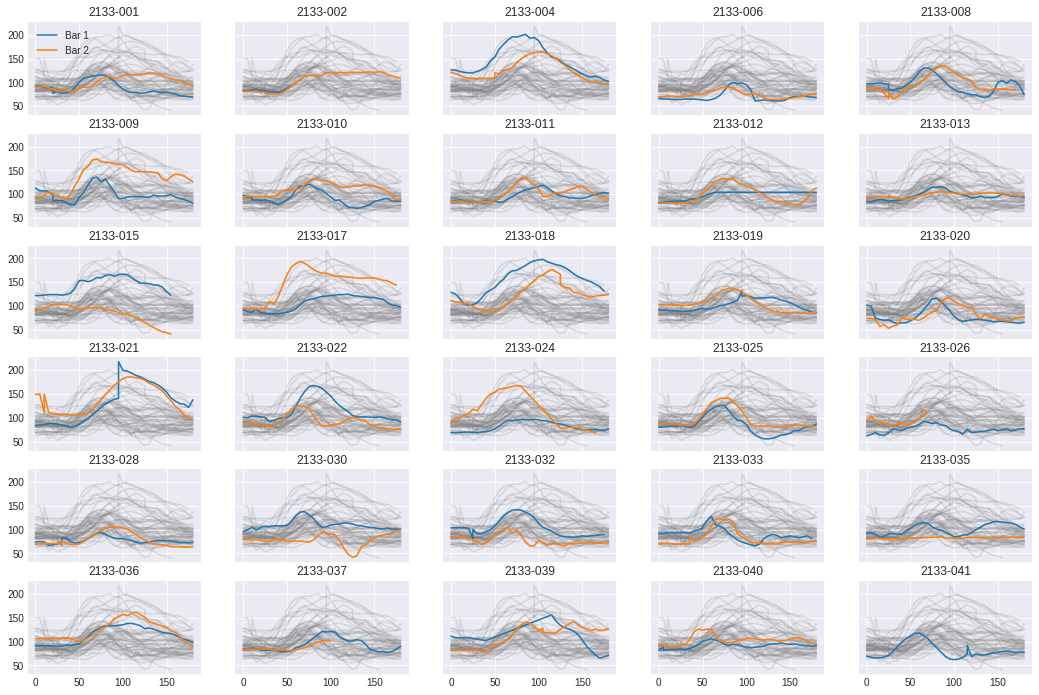

In [15]:
plt.figure(figsize=(18,12))
plt.style.use('seaborn-darkgrid')

for i, highlighted_subject in enumerate(pd.unique(df_meal.userID)):
    plt.subplot(6,5,i+1)

    for subject in pd.unique(df_meal.userID):
        for meal in pd.unique(df_meal.Meal):
            df_meal_subject = df_meal[(df_meal.userID == subject) & (df_meal.Meal == meal)]
            plt.plot(df_meal_subject.baseline_minutes, df_meal_subject.GlucoseValue, color = "gray", alpha = .2, label='_nolegend_')
    
    df_subject = df_meal[df_meal.userID == highlighted_subject]
    for meal in pd.unique(df_subject.Meal):
        df_meal_subject = df_subject[df_subject.Meal == meal]
        plt.plot(df_meal_subject.baseline_minutes, df_meal_subject.GlucoseValue, label = meal)
    plt.title(highlighted_subject)
    if i == 0:
        plt.legend()

    if i%5 != 0:
        plt.tick_params(labelleft=False)
    if i < (30-5):
        plt.tick_params(labelbottom=False)

        



In [32]:
pd.pivot(df_meals[df_meals.Meal.str.contains("PB")][["userID", "Meal", "baseline_minutes", "GlucoseValue"]],values= "GlucoseValue", 
        columns = ["userID", "Meal", "baseline_minutes", "GlucoseValue"] )

AssertionError: Length of index, columns, and values must be the same

In [39]:
groups = [group for _, group in 
          df_meals[df_meals.Meal.str.contains("PB")][["userID", "Meal", "baseline_minutes", "GlucoseValue"]].groupby(["userID", "Meal"])]

#df_meals[df_meals.Meal.str.contains("PB")][["userID", "Meal", "baseline_minutes", "GlucoseValue"]]

In [41]:
groups[0]

userID  Meal  baseline_minutes  GlucoseValue
0   2133-001  PB 1               0.0          81.0
1   2133-001  PB 1               5.0          78.0
2   2133-001  PB 1              10.0          77.0
3   2133-001  PB 1              15.0          79.0
4   2133-001  PB 1              20.0          81.0
5   2133-001  PB 1              25.0          78.0
6   2133-001  PB 1              25.0          76.0
7   2133-001  PB 1              30.0          77.0
8   2133-001  PB 1              35.0          77.0
9   2133-001  PB 1              40.0          77.0
10  2133-001  PB 1              45.0          84.0
11  2133-001  PB 1              55.0          92.0
12  2133-001  PB 1              60.0          88.0
13  2133-001  PB 1              65.0          84.0
14  2133-001  PB 1              70.0          81.0
15  2133-001  PB 1              75.0          80.0
16  2133-001  PB 1              80.0          82.0
17  2133-001  PB 1              85.0          83.0
18  2133-001  PB 1              90.0          82.0
19  2133-001  PB 1              95.0          83.0
20  2133-001  PB 1             100.0          82.0
21  2133-001  PB 1             105.0          82.0
22  2133-001  PB 1             110.0          82.0
23  2133-001  PB 1             115.0          83.0
24  2133-001  PB 1             120.0          83.0
25  2133-001  PB 1             125.0          83.0
26  2133-001  PB 1             130.0          83.0
27  2133-001  PB 1             135.0          84.0
28  2133-001  PB 1             140.0          84.0
29  2133-001  PB 1             145.0          83.0
30  2133-001  PB 1             150.0          82.0
31  2133-001  PB 1             155.0          79.0
32  2133-001  PB 1             160.0          77.0
33  2133-001  PB 1             165.0          75.0
34  2133-001  PB 1             170.0          75.0
35  2133-001  PB 1             175.0          75.0
36  2133-001  PB 1             180.0          76.0

In [17]:
df_meal = df_meals[(df_meals.Meal == "Bar 1") | (df_meals.Meal == "Bar 2")]


Meal    userID                time  GlucoseValue baseline_time  \
148  Bar 1  2133-001 2016-08-12 07:50:00          92.0      00:00:00   
149  Bar 1  2133-001 2016-08-12 07:55:00          92.0      00:05:00   
150  Bar 1  2133-001 2016-08-12 08:00:00          90.0      00:10:00   
151  Bar 1  2133-001 2016-08-12 08:05:00          89.0      00:15:00   
152  Bar 1  2133-001 2016-08-12 08:10:00          90.0      00:20:00   

    baseline_glucose  baseline_minutes  
148                0               0.0  
149                0               5.0  
150               -2              10.0  
151               -3              15.0  
152               -2              20.0

In [6]:
len(pd.unique(df_meals.userID))

30